Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.1597
Epoch 2/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0130
Epoch 3/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0061
Epoch 4/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0047
Epoch 5/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0040
Epoch 6/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0040
Epoch 7/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0040
Epoch 8/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0035
Epoch 9/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0034
Epoch 10/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0039
Epoch 11/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0035
Epoch 12/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0035
Epoch 13/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0037
Epoch 14/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0035
Epoch 15/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0037
Epoch 16/25
17

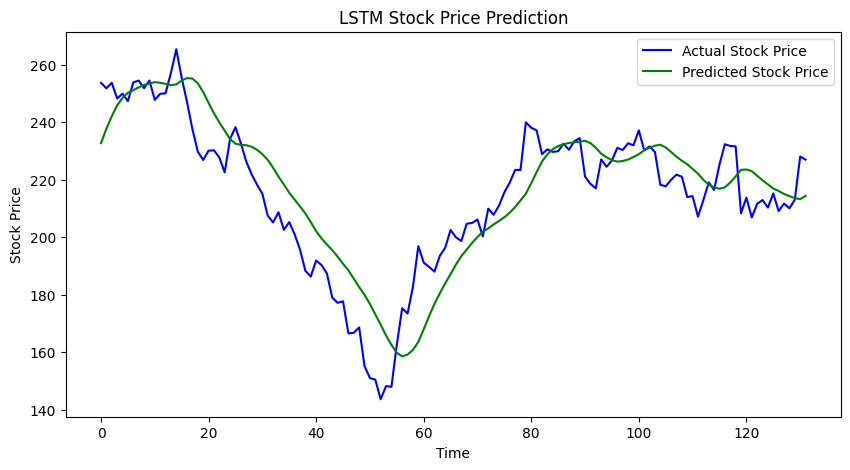

In [4]:
# Install dependencies (if not installed)
!pip install tensorflow pandas numpy scikit-learn matplotlib

# Import necessary libraries
import pandas as pd
import numpy as nm
import matplotlib.pyplot as mtp
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load dataset
d_data = pd.read_csv('/content/tesla-stock-price.csv')

# Use the actual stock price column (e.g., 'close' or 'open')
stock_prices = d_data['close'].values.reshape(-1, 1)  # Choose 'close' or 'adj close'

# Scale stock prices for LSTM
scaler = MinMaxScaler(feature_range=(0,1))  # Normalize between 0 and 1
scaled_data = scaler.fit_transform(stock_prices)

# Function to create sequences for LSTM
def seq_creation(data, seq_length):
    a, b = [], []
    for i in range(len(data) - seq_length - 1):
        seq = data[i:(i + seq_length), 0]  # Extract sequences
        a.append(seq)
        b.append(data[i + seq_length, 0])  # Predict next stock price
    return nm.array(a), nm.array(b)

# Define sequence length
seq_length = 100
X, Y = seq_creation(scaled_data, seq_length)

# Split into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[0:train_size, :], X[train_size:len(X), :]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Reshape for LSTM (samples, time steps, features)
X_train = nm.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = nm.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')  # Adam is better than SGD

# Train the model
model.fit(X_train, Y_train, epochs=25, batch_size=32)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions to get actual stock prices
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Plot actual vs predicted stock prices
mtp.figure(figsize=(10,5))
mtp.plot(Y_test, color='blue', label='Actual Stock Price')
mtp.plot(predictions, color='green', label='Predicted Stock Price')
mtp.title('LSTM Stock Price Prediction')
mtp.xlabel('Time')
mtp.ylabel('Stock Price')
mtp.legend()
mtp.show()

In [8]:
from sklearn.metrics import mean_absolute_percentage_error
print("Accuracy:", (100 - mean_absolute_percentage_error(Y_test,predictions) * 100))


Accuracy: 94.94626100300357
